In [1]:
%reload_ext autoreload
%autoreload 2

In [14]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from visualstoryteller.mixutils import crop_center, load_image, load_content_image, save_image
import matplotlib.pylab as plt
import numpy as np
import functools
import requests
from PIL import Image
from io import BytesIO
import random

@functools.lru_cache(maxsize=None)
def load_here_content_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  # image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  # img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  r = requests.get(image_url)
  im = Image.open(BytesIO(r.content))
  img = np.array(im).reshape((im.size[1],im.size[0],3))
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = np.expand_dims(img, axis = 0)
    #img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return (im, img, np.array(im), im.size[1],im.size[0])


class ContentImg():

    per_page = 200
    pixabay = 'https://pixabay.com/api/'
    pixabay_id = os.getenv('PIXABAY_KEY')

    def __init__(self):
        pass

        params = {
            'key': self.pixabay_id,
            'q': '+'.join(words),
            'image_type': 'photo',
            'safesearch': True,
            'per_page': self.per_page,
            'colors': "grayscale"
        }

        response = requests.get(self.pixabay, params=params)
        json_file = response.json()
        if json_file['total'] > 0:
            length_results = len(json_file['hits'])
            index = random.randint(0, length_results - 1)
            img_link = json_file['hits'][index]['webformatURL']
            author_name = json_file['hits'][index]['user']
            return img_link, author_name, '' # empty as author_profile
        # else try unsplash
        print('unsplash or nothing')
        return "nothing", words[0], "nothing"

In [15]:
list_of_words = ['car', 'house', 'fly', 'people', 'demo']
pics_info = []

In [17]:
for word in list_of_words:
    cnt = ContentImg()
    picinfo = cnt.get_content([list_of_words[0]])
    pics_info.append(picinfo)
    picurl = picinfo[0]
    if picurl != "nothing":
        im, img, nimg, s1, s2 = load_here_content_image(picurl)
        im
        print(nimg.shape, s1, s2)

{'total': 578, 'totalHits': 500, 'hits': [{'id': 362150, 'pageURL': 'https://pixabay.com/photos/man-car-repair-car-repair-362150/', 'type': 'photo', 'tags': 'man, car, repair', 'previewURL': 'https://cdn.pixabay.com/photo/2014/06/04/16/36/man-362150_150.jpg', 'previewWidth': 150, 'previewHeight': 99, 'webformatURL': 'https://pixabay.com/get/g91329ba25fd7886f1b0eb630df341419ce36326ccdc110e9254a578d7d1f261229ea0e31b5c44d0250df5fe662705c97_640.jpg', 'webformatWidth': 640, 'webformatHeight': 426, 'largeImageURL': 'https://pixabay.com/get/gdfb92efa331c6f457ff387c0e777bdfd721d0829ddf313e426e333dc8c8578cef70c1b1807854d77513d2491540af76cd9c6fe081cd69379584f942af8e4fe21_1280.jpg', 'imageWidth': 6000, 'imageHeight': 4000, 'imageSize': 8544150, 'views': 344454, 'downloads': 165372, 'favorites': 641, 'likes': 616, 'comments': 110, 'user_id': 123690, 'user': 'RyanMcGuire', 'userImageURL': 'https://cdn.pixabay.com/user/2014/06/04/17-13-09-273_250x250.jpg'}, {'id': 1376190, 'pageURL': 'https://pixaba

ValueError: cannot reshape array of size 272640 into shape (426,640,3)

In [21]:
picurl

'https://pixabay.com/get/g829cd836b212878f98d5af3ca0abc24bb81a4c8c887dc424ce6af31b8cd644792ee0a40afd0b8684fe90da6f1d37bdc313181d4bbb19aad3af71379e27e72c9e_640.jpg'

In [31]:
r = requests.get(picurl)
im = Image.open(BytesIO(r.content))



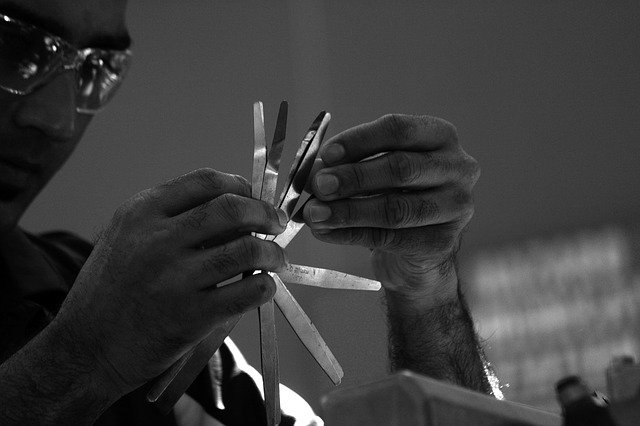

In [24]:
im

In [23]:
img = np.array(im).reshape((im.size[1],im.size[0],3))
if img.max() > 1.0
    img = img / 255.
if len(img.shape) == 3:
    img = np.expand_dims(img, axis = 0)
#img = tf.stack([img, img, img], axis=-1)
img = crop_center(img)
img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
return (im, img, np.array(im), im.size[1],im.size[0])

IndentationError: expected an indented block (<ipython-input-23-6c22348720f3>, line 3)

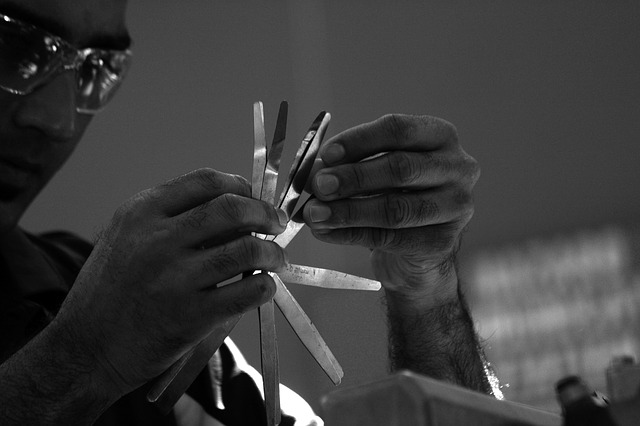

In [33]:
im.convert("RGB")

In [27]:
im.category

0

In [35]:
img = np.array(im.convert("RGB")).reshape((im.size[1],im.size[0],3))


In [36]:
img

array([[[15, 15, 15],
        [17, 17, 17],
        [17, 17, 17],
        ...,
        [54, 54, 54],
        [54, 54, 54],
        [56, 56, 56]],

       [[14, 14, 14],
        [16, 16, 16],
        [16, 16, 16],
        ...,
        [54, 54, 54],
        [55, 55, 55],
        [57, 57, 57]],

       [[13, 13, 13],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [55, 55, 55],
        [56, 56, 56],
        [58, 58, 58]],

       ...,

       [[20, 20, 20],
        [15, 15, 15],
        [11, 11, 11],
        ...,
        [41, 41, 41],
        [41, 41, 41],
        [40, 40, 40]],

       [[17, 17, 17],
        [17, 17, 17],
        [13, 13, 13],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [43, 43, 43]],

       [[16, 16, 16],
        [16, 16, 16],
        [13, 13, 13],
        ...,
        [41, 41, 41],
        [42, 42, 42],
        [43, 43, 43]]], dtype=uint8)

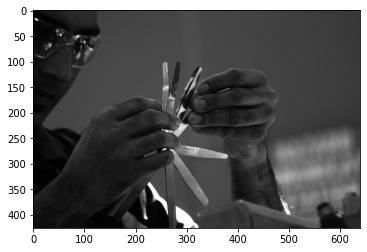

In [38]:
plt.imshow(img)

In [1]:
contenturl = 'https://media-exp1.licdn.com/dms/image/C4E03AQF769EQZok1xQ/profile-displayphoto-shrink_800_800/0/1529940108624?e=1620864000&v=beta&t=PKINWIIzgGYkDVKESkqQPsXneXtai3vnM4os0znNXcE'

In [2]:
styleurl = 'https://media-exp1.licdn.com/dms/image/C4E03AQF769EQZok1xQ/profile-displayphoto-shrink_800_800/0/1529940108624?e=1620864000&v=beta&t=PKINWIIzgGYkDVKESkqQPsXneXtai3vnM4os0znNXcE'

In [8]:
from visualstoryteller.mixmorepics import GetStylePics
from visualstoryteller.mixutils import load_local_image

In [9]:
cc = GetStylePics()

In [13]:
cnt = load_local_image('/Users/ger/Downloads/greg_face.jpg')
stl = load_local_image('/Users/ger/Downloads/greg_face.jpg')


In [14]:
cc.content_image = [cnt]
cc.style_image = [stl]

In [15]:
cc.stylize()

In [16]:
stg = cc.stylized_image[0]

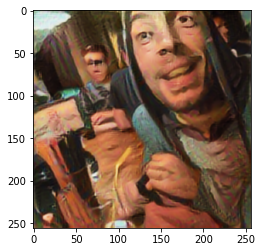

In [20]:
import matplotlib.pyplot as plt
plt.imshow(stg[0])